<a href="https://colab.research.google.com/github/sradhass88/Assignments/blob/main/Sradha_S_Assignment_on_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the Dataset into the Python Environment

In [231]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Load the dataset

df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ the Index Column

In [233]:
# Set 'PassengerId' as the index column
df.set_index('PassengerId', inplace=True)

3. Check Basic Details of the Dataset

In [234]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [236]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [237]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


4. Fill in all the missing values present in all the columns in the dataset


In [238]:
# Fill missing values for numerical columns with the median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values for categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [239]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


5.Check and handle outliers in at least 3 columns in the dataset

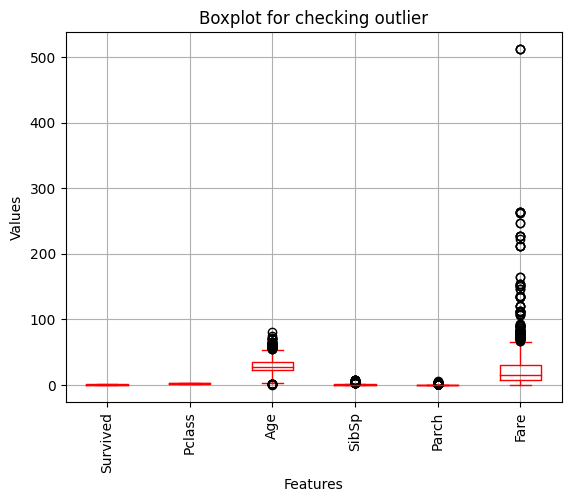

In [240]:
# Outlier checking using boxplot
df.boxplot(color='red')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [241]:
# List of columns to check for outliers
columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Handle outliers using IQR by clipping
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values to the bounds
    df[column] = np.clip(df[column], lower_bound, upper_bound)

# Check the cleaned data
print(df.describe())

         Survived      Pclass         Age       SibSp  Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.0  891.000000
mean     0.383838    2.308642   29.039282    0.426487    0.0   24.046813
std      0.486592    0.836071   12.072074    0.708246    0.0   20.481625
min      0.000000    1.000000    2.500000    0.000000    0.0    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.0    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.0   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.0   31.000000
max      1.000000    3.000000   54.500000    2.500000    0.0   65.634400


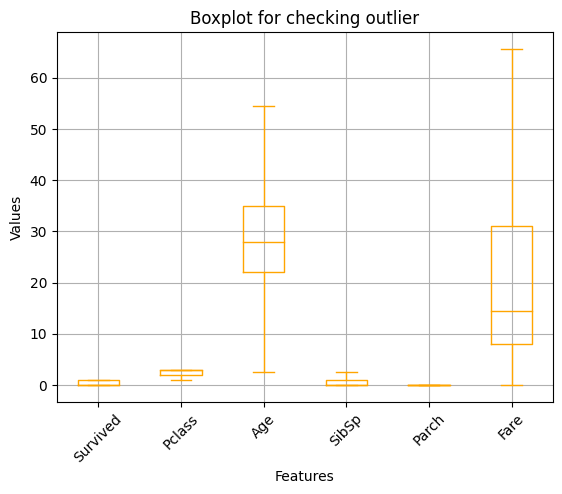

In [242]:
# Outlier checking using boxplot
df.boxplot(color='orange')
plt.xticks(rotation=45)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [243]:
from sklearn.preprocessing import MinMaxScaler

# Features and target
features = df.drop(columns=['Survived'])
target = df['Survived']

# Select only numerical columns for scaling
numerical_features = features.select_dtypes(include=['number'])

# Apply Min-Max Scaling to numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features.columns, index=features.index)
# Min-Max Scaling
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns, index=features.index)

# Add the target column back
scaled_df = pd.concat([scaled_features, target], axis=1)

In [244]:
scaled_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,
1,1.0,0.375000,0.4,0.0,0.110460,0
2,0.0,0.682692,0.4,0.0,1.000000,1
3,1.0,0.451923,0.0,0.0,0.120745,1
4,0.0,0.625000,0.4,0.0,0.809027,1
5,1.0,0.625000,0.0,0.0,0.122649,0


In [245]:
# This adds the scaled columns back to the original DataFrame
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']] = scaled_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [246]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,1.0,"Braund, Mr. Owen Harris",male,0.375000,0.4,0.0,A/5 21171,0.110460,B96 B98,S
2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.682692,0.4,0.0,PC 17599,1.000000,C85,C
3,1,1.0,"Heikkinen, Miss. Laina",female,0.451923,0.0,0.0,STON/O2. 3101282,0.120745,B96 B98,S
4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.625000,0.4,0.0,113803,0.809027,C123,S
5,0,1.0,"Allen, Mr. William Henry",male,0.625000,0.0,0.0,373450,0.122649,B96 B98,S
